In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
# Load your data (assuming it's already in a DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment if reading from CSV
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import pickle
from tensorflow.keras.models import load_model

In [30]:
# List of libraries you are using
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import pickle
import sys

# Get the versions of the libraries
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"pickle module version: built-in Python {sys.version}")

# Save versions to a requirements.txt file
with open('requirements.txt', 'w') as f:
    f.write(f"pandas=={pd.__version__}\n")
    f.write(f"numpy=={np.__version__}\n")
    f.write(f"tensorflow=={tf.__version__}\n")
    f.write(f"scikit-learn=={sklearn.__version__}\n")
    f.write(f"pickle (built-in Python {sys.version})\n")


pandas version: 2.2.2
numpy version: 1.26.4
tensorflow version: 2.17.1
scikit-learn version: 1.6.0
pickle module version: built-in Python 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:

# Assuming the CSV file is named 'data.csv' and is in the current directory
df = pd.read_csv('/content/drive/MyDrive/HUL_Haridwar/Seal_quality_NN_training/mc19_Train_data.csv')

# Display the first few rows of the DataFrame
df.head()


T         Ts         K        Is         P      E_heat   E_press  \
0  142.873681  55.880364  0.000367  3.574147  3.129330  208.196326  0.112477   
1  142.810647  57.403593  0.000360  3.585089  3.158852  208.244911  0.108421   
2  143.159656  53.774714  0.000338  3.414805  3.181252  232.012538  0.111325   
3  143.307924  54.002704  0.000362  3.497651  3.430993  216.562101  0.107254   
4  142.902943  53.870177  0.000374  3.500870  3.267872  208.898457  0.117675   

    Quality  
0  0.761064  
1  0.766587  
2  0.758101  
3  0.751066  
4  0.765453

In [33]:
df.describe()

T            Ts             K            Is             P  \
count  19200.000000  19200.000000  19200.000000  19200.000000  19200.000000   
mean     147.095738     55.513694      0.000362      3.316272      3.129823   
std       13.436461      1.447231      0.000016      1.829568      1.839812   
min      124.500946     53.000088      0.000334      0.400145      0.100044   
25%      136.000573     54.262566      0.000348      1.824996      1.674835   
50%      147.499104     55.501579      0.000362      3.250009      3.049614   
75%      158.000440     56.767724      0.000376      4.674929      4.524901   
max      169.498781     57.999912      0.000390      6.599977      6.499616   

             E_heat       E_press       Quality  
count  19200.000000  19200.000000  19200.000000  
mean     222.606839      0.105784      0.514472  
std       34.420032      0.062412      0.176825  
min      150.921670      0.003190      0.180170  
25%      193.975914      0.055210      0.395514  
50%      222.326948      0.102636      0.518694  
75%      250.231695      0.153299      0.634045  
max      304.744969      0.236038      0.899852

In [34]:
df.shape

(19200, 8)

In [35]:

# Separate features and target (optional, if applicable)
X = df.drop(columns=['Quality'])  # Replace with your target column
y = df['Quality']

# Step 2: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the training and testing sets using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on training data and transform both train and test datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Save the scaled datasets
# Convert the scaled arrays back to DataFrame for easy saving
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Save the scaled train and test sets to CSV files
X_train_scaled_df.to_csv('scaled_X_train.csv', index=False)
X_test_scaled_df.to_csv('scaled_X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Step 5: Save the scaler to a pickle file for future use
with open('seal_strength_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Train and test datasets scaled and saved. Scaler saved as scaler.pkl.")


Train and test datasets scaled and saved. Scaler saved as scaler.pkl.


In [36]:
x = pd.read_csv('/content/scaled_X_train.csv')
y = pd.read_csv('/content/y_train.csv')
y.head()

Quality
0  0.764836
1  0.659852
2  0.760633
3  0.283907
4  0.688651

****

# ***Training***

In [37]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
import tensorflow as tf

# Step 1: Load the scaled train and test datasets
X_train = pd.read_csv('/content/scaled_X_train.csv')
X_test = pd.read_csv('/content/scaled_X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')

# Ensure target is in the correct shape
y_train = y_train.values.ravel()  # Convert to 1D array
y_test = y_test.values.ravel()

# Step 2: Build a regression neural network
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer 1
    Dense(8, activation='relu'),   # Hidden layer 2
    Dense(1)  # Output layer (for regression, no activation function needed)
])

# Step 3: Compile the model with MSE loss and RMSE as a metric
#model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Step 4: Create a callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('seal_strength_best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Step 5: Train the model and validate on the test set
history = model.fit(X_train, y_train, epochs= 80, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Step 6: Evaluate on the test data to check RMSE on test set
test_loss, test_rmse = model.evaluate(X_test, y_test)
print(f'Test RMSE: {test_rmse:.2f}')

# Step 7: Predict and calculate R² score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Test R² Score: {r2:.2f}')


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



469/480 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255 - root_mean_squared_error: 0.1559
Epoch 1: val_loss improved from inf to 0.00546, saving model to seal_strength_best_model.keras
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0252 - root_mean_squared_error: 0.1550 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 2/80
458/480 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623
Epoch 2: val_loss improved from 0.00546 to 0.00199, saving model to seal_strength_best_model.keras
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0039 - root_mean_squared_error: 0.0619 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 3/80
447/480 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 3: val_loss improved from 0.00199 to 0.00146, saving model to seal_strength_best_model.keras
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0015 - val_root_m

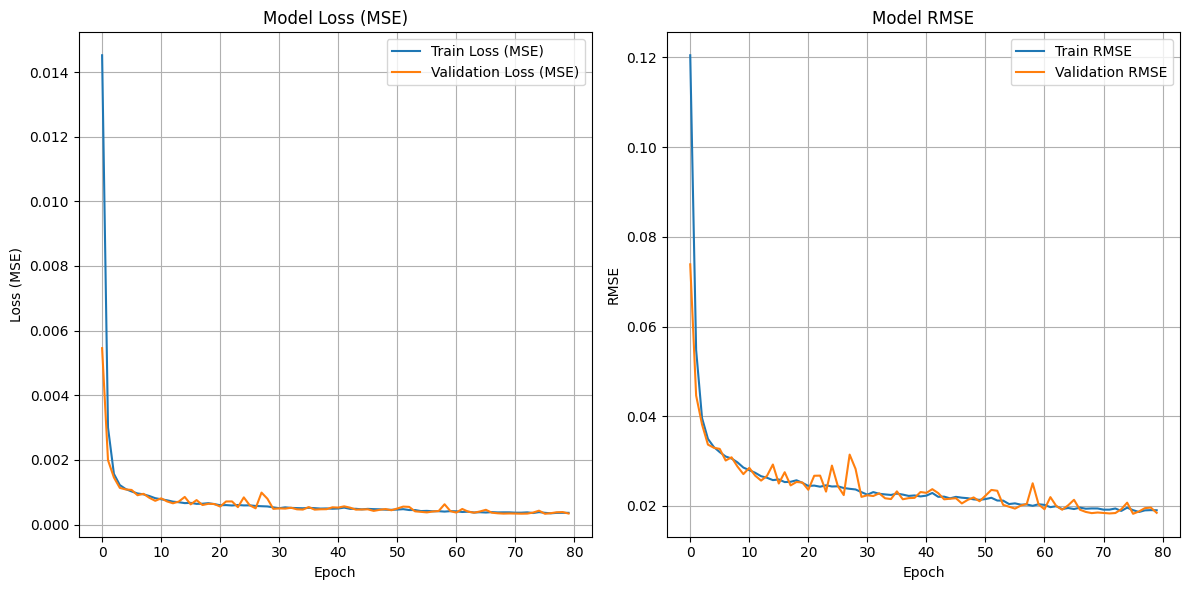

In [39]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have 'history'
# Example:
# history = model.fit(...)

# Step 1: Get the loss (MSE) and RMSE from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Step 2: Create a plot for training and validation loss (MSE)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss (MSE)')
plt.plot(val_loss, label='Validation Loss (MSE)')
plt.title('Model Loss (MSE)')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

# Step 3: Create a plot for RMSE
plt.subplot(1, 2, 2)
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
X_train.head(1)

T        Ts         K        Is         P    E_heat   E_press
0  0.033532  0.335206  0.375027  0.867867  0.890425  0.237235  0.890425

In [40]:
#%%writefile Calc_seal_strength.py

# Step 1: Load the saved model
model = load_model('/content/seal_strength_best_model.keras')

# Step 2: Load the saved scaler
with open('/content/seal_strength_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Step 3: Function to provide hardcoded input data
def get_user_input():
    # Hardcoded input values
    input_data = pd.DataFrame({
        'T': [150.5],
        'Ts': [56.6],
        'K': [0.00032],
        'Is': [3.4],
        'P': [3.25],
        'E_heat': [271.2],
        'E_press': [0.11]
    })
    return input_data

# Step 4: Function to scale the input and make predictions
def predict_class(input_data):
    # Scale the input using the saved scaler
    scaled_input = scaler.transform(input_data)

    # Predict using the trained model
    prediction = model.predict(scaled_input)


    return prediction

    #return predicted_class

# Step 5: Main function to run the script
if __name__ == "__main__":
    # Get hardcoded input
    user_input = get_user_input()

    # Predict the class based on the input
    predicted_class = predict_class(user_input)

    # Output the predicted class
    print(f'Predicted class: {predicted_class[0][0]}')  # Display 0 or 1 based on the prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted class: 0.7693474888801575


# Batch prediction

**Enter all parameters according to machine**

In [41]:
import os

In [42]:
num_samples = 100000   # Define the number of rows
Machine_name = 'mc19'
folder_path = '/content'
dataset_type = 'Test_dataset'
#################################Roll & env parameters ######################################
Heat_cond_coeff_min = 0.00034    # K-sq.m/W
Heat_cond_coeff_max = 0.00035
delta_thickenss_min = 0.0700     # In mm
delta_thickenss_max = 0.071
Sachet_temp_min = 55.9
Sachet_temp_max = 56.1
###########################Settings & variations##############################


Sealer_temp_min = 125 # Check setting values first
Sealer_temp_max = 169
Seal_mot_current_min = 0.01
Seal_mot_current_max = 8.0
# Seal_quality_min = 2.3
# Seal_quality_max = 2.8

########################################################

feature_dict = {'T': [Sealer_temp_min, Sealer_temp_max], 'Ts': [Sachet_temp_min, Sachet_temp_max], 'K': [Heat_cond_coeff_min, Heat_cond_coeff_max],
                'Is': [Seal_mot_current_min, Seal_mot_current_max], 'd': [delta_thickenss_min, delta_thickenss_max],
                  }

#############################################################################################

data = {key: np.random.uniform(low=values[0], high=values[1], size=num_samples)
        for key, values in feature_dict.items()}

df = pd.DataFrame(data)

df['P'] = 0.9* df['Is']
#df.head()

################################################################################################

df['E_heat'] = ((df['T'] - df['Ts']) * 0.0008784) / df['K']
df['E_press'] = (df['P'] * df['d']) * 0.47072
df.drop(columns=['d'], inplace=True)

#df.head()

###################################################################################################

os.makedirs(folder_path, exist_ok=True)

filename = f"{Machine_name}_{dataset_type}.csv"

file_path = os.path.join(folder_path, filename)

df.to_csv(file_path, index=False)

print(f"DataFrame saved successfully to {file_path}")
df.describe()



DataFrame saved successfully to /content/mc19_Test_dataset.csv


T             Ts              K             Is  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      146.973263      55.999832       0.000345       3.997333   
std        12.707619       0.057690       0.000003       2.304587   
min       125.000282      55.900001       0.000340       0.010110   
25%       135.971663      55.949991       0.000342       1.999038   
50%       146.994939      55.999564       0.000345       3.998654   
75%       157.983017      56.049638       0.000347       5.994253   
max       168.999685      56.099998       0.000350       7.999917   

                   P         E_heat        E_press  
count  100000.000000  100000.000000  100000.000000  
mean        3.597599     231.650462       0.119388  
std         2.074128      32.425861       0.068833  
min         0.009099     173.020410       0.000301  
25%         1.799134     203.581122       0.059711  
50%         3.598788     231.624482       0.119452  
75%         5.394828     259.689207       0.179034  
max         7.199925     291.885483       0.240609

In [44]:
#%%writefile Calc_seal_strength_batch.py

import pandas as pd
import pickle
from tensorflow.keras.models import load_model

# Step 1: Load the saved model
model = load_model('/content/mc19_seal_strength_best_model.keras')

# Step 2: Load the saved scaler
with open('/content/mc19_seal_strength_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Step 3: Function to load input data from a CSV file
def load_batch_input(file_path):
    # Read the CSV file containing input data
    input_data = pd.read_csv(file_path)
    return input_data

# Step 4: Function to scale the input and make predictions
def predict_batch(input_data):
    # Scale the input using the saved scaler
    scaled_input = scaler.transform(input_data)

    # Predict using the trained model
    predictions = model.predict(scaled_input)

    # Add predictions as a new column in the input data
    input_data['Predicted_Seal_Strength'] = predictions[:, 0]  # Assuming single-output model

    return input_data

# Step 5: Main function to run the script
if __name__ == "__main__":
    # Path to the input CSV file
    input_file_path = '/content/mc19_Test_dataset.csv'  # Replace with your CSV file name

    # Path to save the output CSV file
    output_file_path = '/content/Sealquality_pred_Test_dataset.csv'

    # Load the batch input data
    batch_input = load_batch_input(input_file_path)

    # Predict the seal strength for the batch input
    batch_output = predict_batch(batch_input)

    # Save the predictions to a new CSV file
    batch_output.to_csv(output_file_path, index=False)

    print(f'Predictions saved to {output_file_path}')


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Predictions saved to /content/Sealquality_pred_Test_dataset.csv


In [45]:
pred_data = pd.read_csv('/content/Sealquality_pred_Test_dataset.csv')
pred_data.head(30)

T         Ts         K        Is         P      E_heat   E_press  \
0   161.200465  55.997402  0.000348  0.391102  0.351991  265.346752  0.011667   
1   159.815876  55.951359  0.000349  0.200877  0.180789  261.668902  0.006001   
2   160.940784  55.994936  0.000348  2.688660  2.419794  264.788278  0.080136   
3   128.644968  56.043435  0.000348  1.048689  0.943820  183.437906  0.031321   
4   148.987011  55.955722  0.000347  7.975283  7.177754  235.499139  0.238205   
5   128.393124  55.939759  0.000347  4.281092  3.852983  183.439747  0.128199   
6   165.826110  56.014286  0.000341  5.110343  4.599309  283.179150  0.153007   
7   167.422132  56.065155  0.000341  1.146953  1.032257  287.027729  0.034372   
8   163.393958  56.010121  0.000344  1.623246  1.460921  274.283413  0.048255   
9   157.844649  56.045642  0.000340  7.640607  6.876547  262.692554  0.228057   
10  160.888003  55.980604  0.000350  4.383358  3.945022  263.626708  0.130697   
11  152.158511  55.969850  0.000350  3.539061  3.185155  241.469237  0.105184   
12  166.818296  55.968579  0.000343  0.935292  0.841763  283.849416  0.028032   
13  152.436472  56.074541  0.000349  5.015714  4.514142  242.312242  0.148958   
14  134.308860  56.047654  0.000342  1.748949  1.574054  201.151773  0.052432   
15  139.425687  56.046973  0.000342  2.393130  2.153817  214.106304  0.071049   
16  149.448147  56.073850  0.000342  4.955663  4.460096  239.912140  0.147474   
17  143.748650  55.918132  0.000340  4.038781  3.634903  226.695782  0.119915   
18  138.250954  56.020869  0.000346  1.613693  1.452324  208.681129  0.048424   
19  131.498528  55.967463  0.000347  4.923411  4.431070  191.095946  0.148049   
20  139.953303  55.913408  0.000350  5.547648  4.992883  211.010251  0.165336   
21  152.953079  55.913454  0.000341  1.667553  1.500797  250.003666  0.049811   
22  162.523153  56.037901  0.000345  7.513870  6.762483  271.477430  0.223734   
23  142.486515  55.984798  0.000341  0.209684  0.188715  222.676664  0.006224   
24  158.368078  56.085314  0.000345  2.726913  2.454222  260.240026  0.081991   
25  157.315804  56.028071  0.000344  2.972449  2.675204  258.423643  0.088787   
26  158.950785  55.954297  0.000345  0.961394  0.865255  262.387403  0.028764   
27  149.518721  55.934740  0.000341  2.834252  2.550827  241.327608  0.085192   
28  150.207418  56.018203  0.000346  6.548415  5.893574  238.967878  0.195821   
29  165.490252  55.918647  0.000345  2.812814  2.531532  279.042588  0.083484   

    Predicted_Seal_Strength  
0                  0.217085  
1                  0.204364  
2                  0.638832  
3                  0.230676  
4                  0.439389  
5                  0.560327  
6                  0.501251  
7                  0.239664  
8                  0.309014  
9                  0.380848  
10                 0.648106  
11                 0.800838  
12                 0.221383  
13                 0.705872  
14                 0.471216  
15                 0.549504  
16                 0.759420  
17                 0.810609  
18                 0.489195  
19                 0.562072  
20                 0.666658  
21                 0.456963  
22                 0.352702  
23                 0.241413  
24                 0.659770  
25                 0.712514  
26                 0.275512  
27                 0.750477  
28                 0.463755  
29                 0.590095

In [46]:
# prompt: Plot static 3d plot with color parameter as Predicted_seal_strength

import plotly.express as px

# Assuming 'pred_data' DataFrame is already loaded as in your provided code

# Create the 3D scatter plot with color parameter
fig = px.scatter_3d(pred_data, x='T', y='P', z='Predicted_Seal_Strength',
                     color='Predicted_Seal_Strength', opacity=0.7)

# Customize the plot for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='T',
        yaxis_title='P',
        zaxis_title='Predicted_Seal_Strength'
    ),
    title='3D Scatter Plot of T, P vs Predicted Seal Strength (Colored by Predicted Strength)'
)

# Show the plot
fig.show()

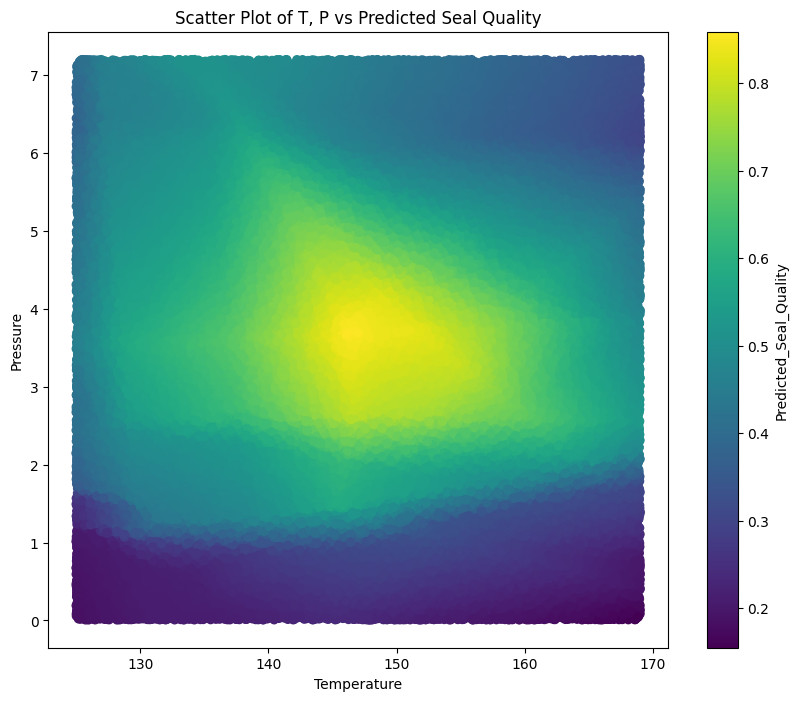

In [51]:
# prompt: plot same plot using matplotlib and save as image

import matplotlib.pyplot as plt

# Assuming 'pred_data' DataFrame is already loaded as in your provided code

# Create the 3D scatter plot with color parameter
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
scatter = plt.scatter(pred_data['T'], pred_data['P'], c=pred_data['Predicted_Seal_Strength'], cmap='viridis')  # Use a colormap
plt.colorbar(scatter, label='Predicted_Seal_Quality')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Scatter Plot of T, P vs Predicted Seal Quality')
plt.savefig("mc19_Prediction_scatter_plot.png") # save as png
plt.show()

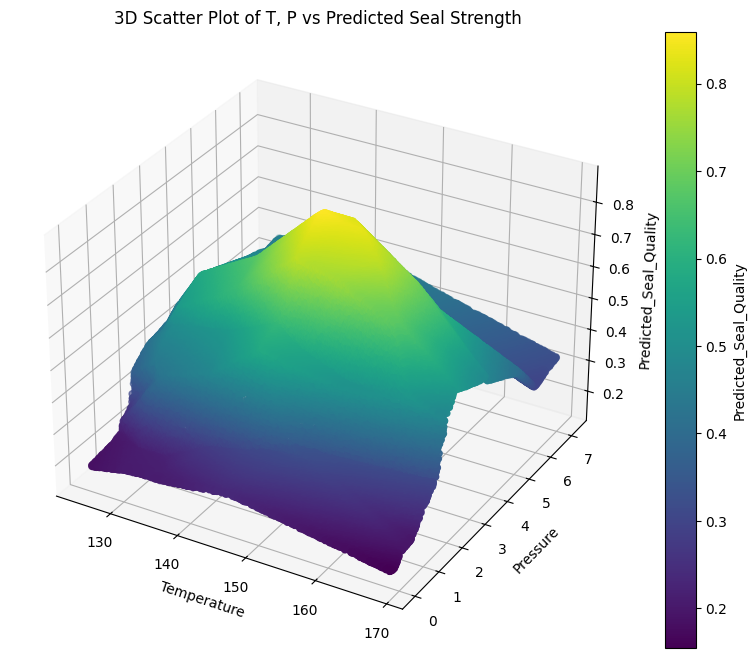

In [50]:
# prompt: convert below code for 3D plot, use only matplotlib.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming 'pred_data' DataFrame is already loaded
# ... (Your existing code to load pred_data) ...

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pred_data['T'], pred_data['P'], pred_data['Predicted_Seal_Strength'],
                     c=pred_data['Predicted_Seal_Strength'], cmap='viridis')

# Customize the plot
ax.set_xlabel('Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('Predicted_Seal_Quality')
ax.set_title('3D Scatter Plot of T, P vs Predicted Seal Strength')
fig.colorbar(scatter, label='Predicted_Seal_Quality')

plt.savefig("mc19_Prediction_scatter_plot_3D.png") # save as png
plt.show()